In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
start_x = start_y = -4
dx = dy = 0.2
stop_x = stop_y = 4
x = np.arange(start_x,stop_x,dx)
y = np.arange(start_y,stop_y,dy)
nx = np.size(x)
ny = np.size(y)
omega = 1
mass = 1
hbar = 1

In [3]:
ord_D1_x = (-np.diag(np.ones(nx),0) + np.diag(np.ones(nx-1),1))/dx
ord_D1_y = (-np.diag(np.ones(ny),0) + np.diag(np.ones(ny-1),1))/dy
ord_D1_x[nx-1,0] = 1/dx
ord_D1_y[ny-1,0] = 1/dy
iden_x = np.eye(nx)
iden_y = np.eye(ny)
par_D1_x = np.kron(ord_D1_x,iden_y)
par_D1_y = np.kron(iden_x,ord_D1_y)

In [4]:
P1_x = -1j * hbar * par_D1_x
P1_y = -1j * hbar * par_D1_y
P2_x = (np.matmul(P1_x,P1_x.conj().T)+np.matmul(P1_x.conj().T,P1_x))/2
P2_y = (np.matmul(P1_y,P1_y.conj().T) + np.matmul(P1_y.conj().T,P1_y))/2

In [5]:
zeros_x = np.zeros(nx)
for i in range(0,2):
    zeros_x[i] = 1e10
    zeros_x[nx-1-i] = 1e10
zeros_y = np.zeros(ny)
for i in range(0,2):
    zeros_y[i] = 1e10
    zeros_y[ny-1-i] = 1e10
zeros_x = np.diag(zeros_x)
zeros_y = np.diag(zeros_y)
v = np.kron(iden_y,zeros_x) + np.kron(zeros_y,iden_x)

In [6]:
H = P2_x/2*mass + P2_y/2*mass + v
eigenvalues , eigenvectors = np.linalg.eigh(H)

<IPython.core.display.Javascript object>


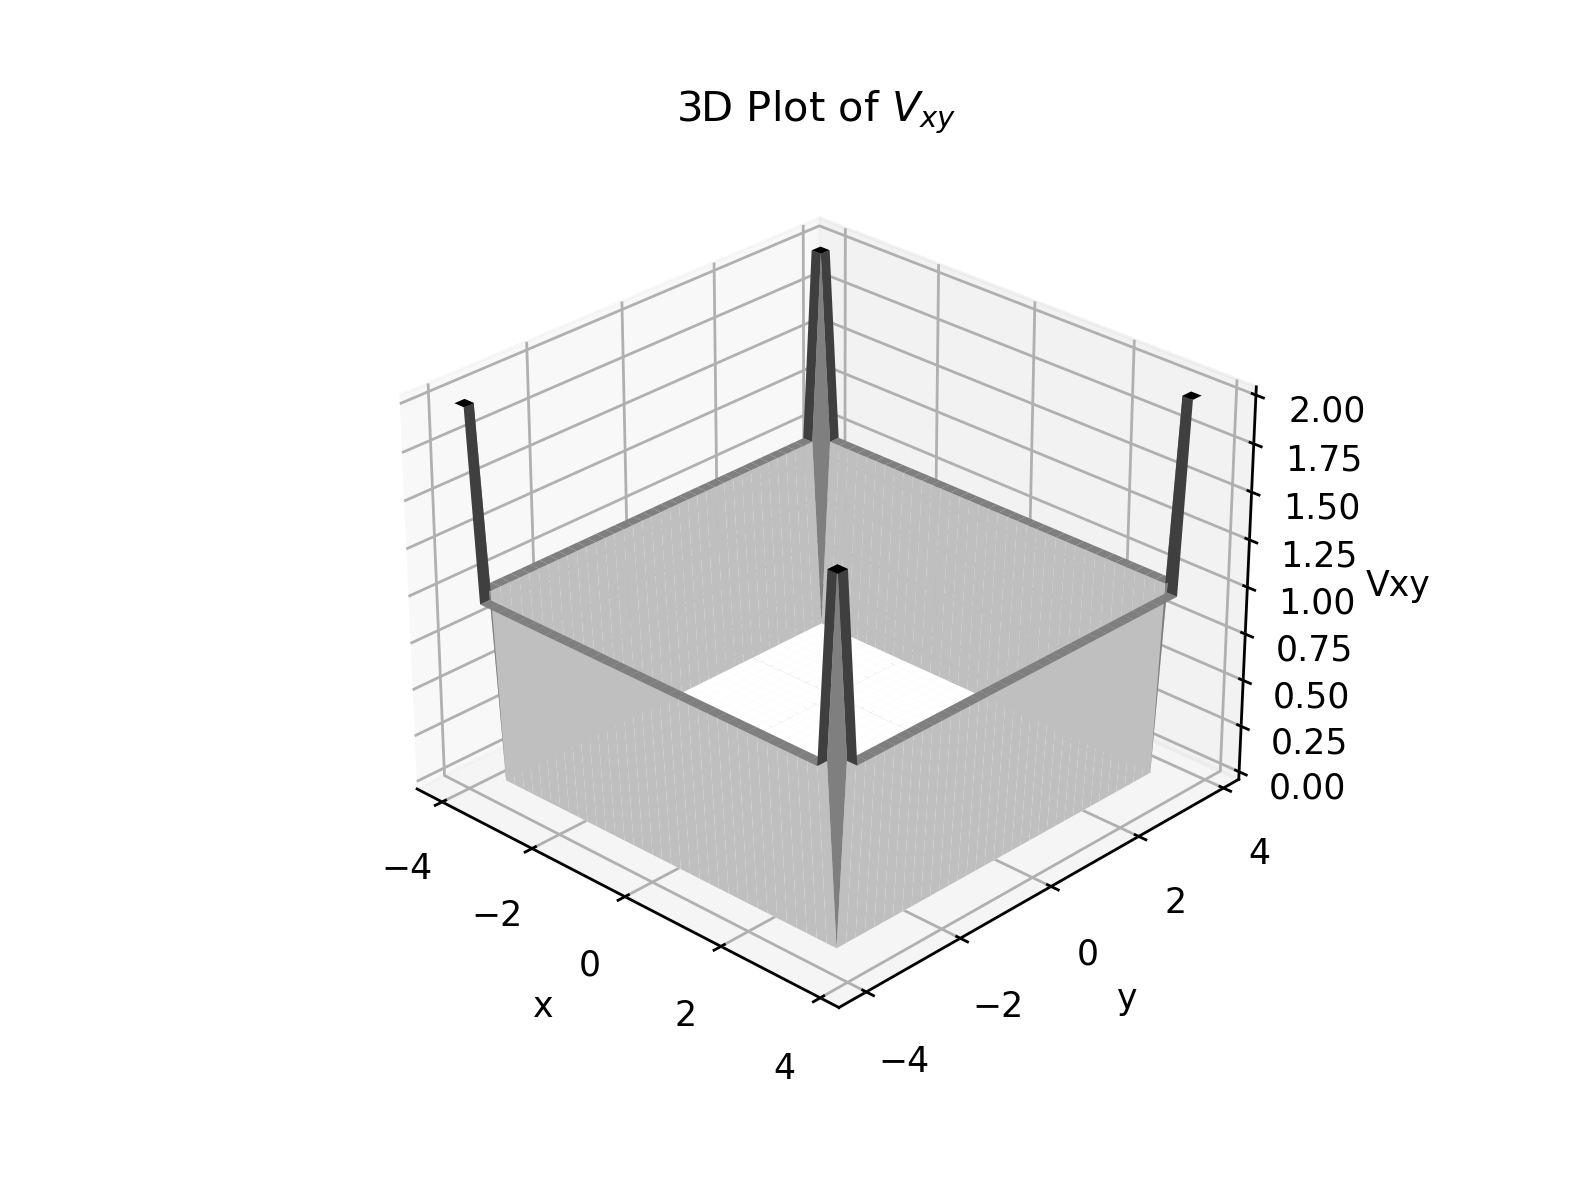

Text(0.5, 0, 'Vxy')

In [7]:
Vxy = np.reshape(np.diag(v),(ny,nx))
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(x, y)
ax.plot_surface(X, Y, Vxy ,cmap='binary')
ax.set_title('3D Plot of $V_{xy}$')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Vxy')

<IPython.core.display.Javascript object>


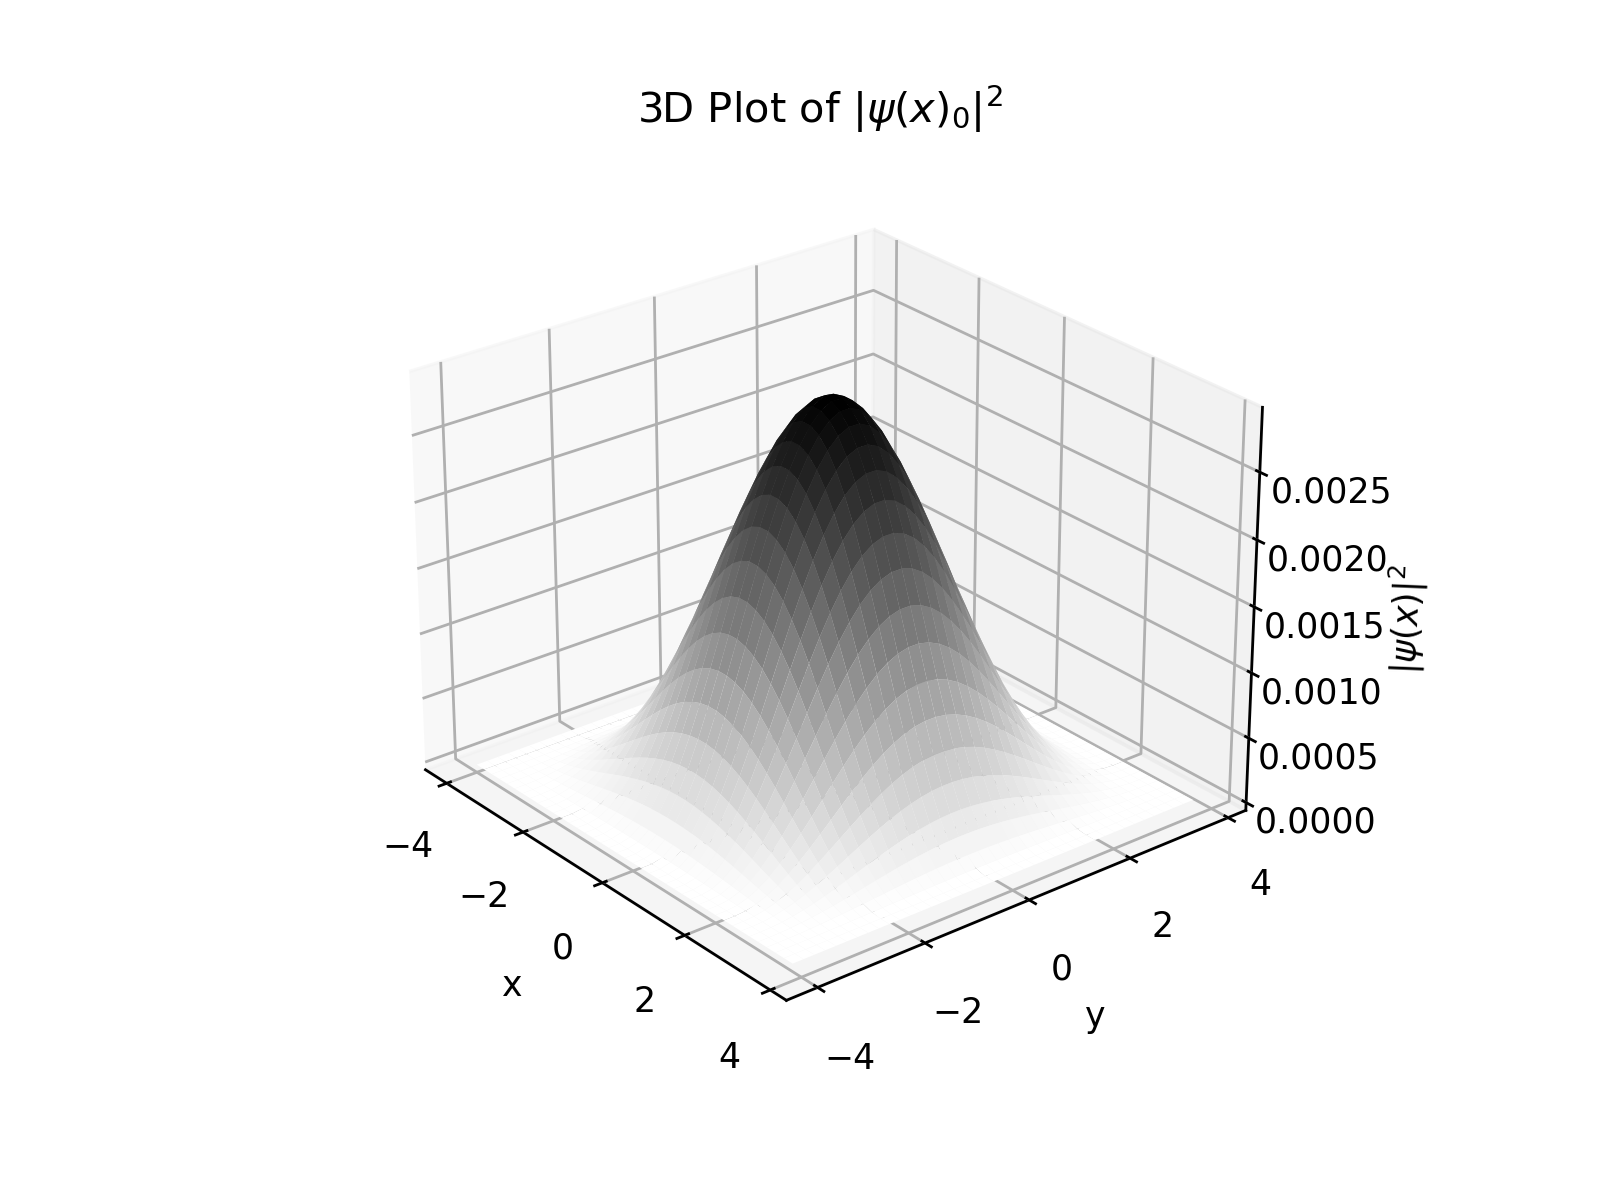

Text(0.5, 0, '$|\\psi(x)|^2$')

In [111]:
wavefunction0 = eigenvectors[:,0]
wavefunction0 = np.reshape(wavefunction0,(ny,nx))
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(x, y)
ax.plot_surface(X, Y, np.abs(wavefunction0)**2 ,cmap='binary')
ax.set_title('3D Plot of $|\psi(x)_0|^2$')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('$|\psi(x)|^2$')

<IPython.core.display.Javascript object>


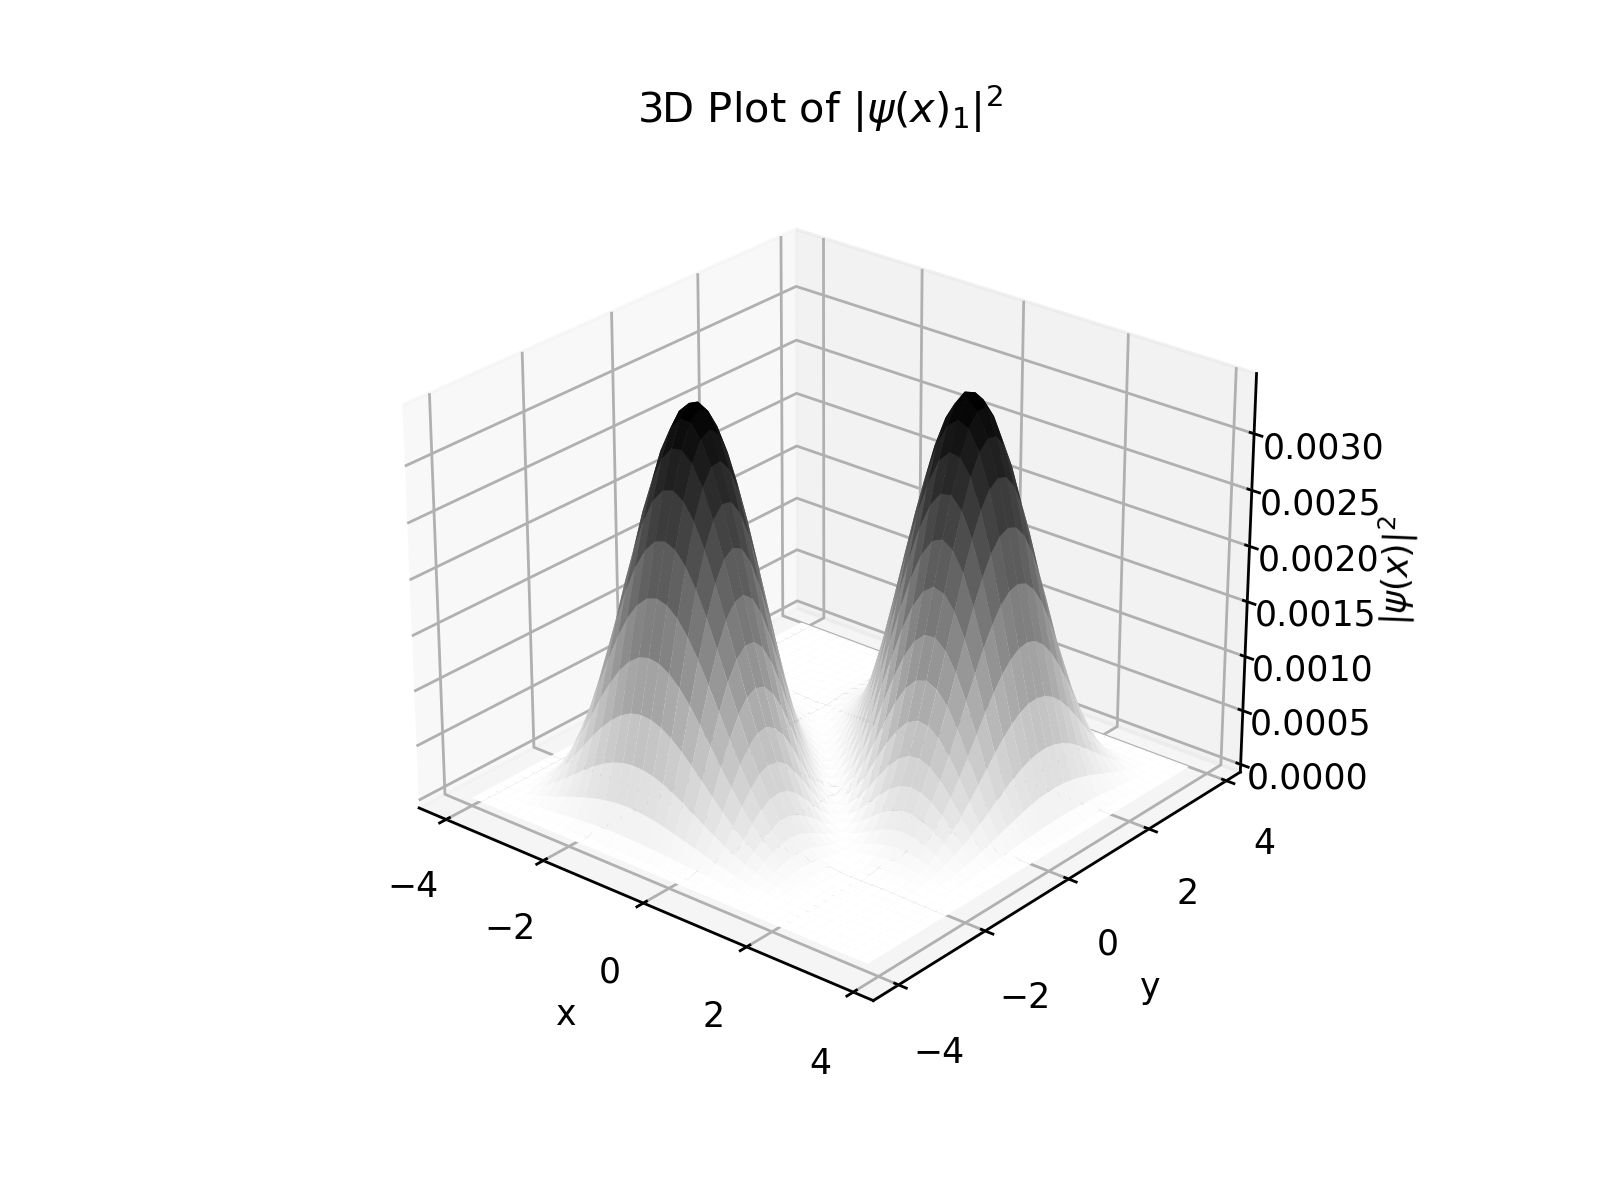

Text(0.5, 0, '$|\\psi(x)|^2$')

In [112]:
wavefunction1 = eigenvectors[:,1]
wavefunction1 = np.reshape(wavefunction1,(ny,nx))
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(x, y)
ax.plot_surface(X, Y, np.abs(wavefunction1)**2 ,cmap='binary')
ax.set_title('3D Plot of $|\psi(x)_1|^2$')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('$|\psi(x)|^2$')